In [29]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [31]:
df = pd.read_csv('./Population of all US Cities 2024.csv')

In [33]:
cities = ["Atlanta", "Austin", "Chicago", "Denver", "Los Angeles", "Nashville", 
          "New York", "San Diego", "Boston", "Tampa"]

# Filter the dataframe
filtered_df = df[df['US City'].isin(cities)]

# Display the filtered data
print(filtered_df)

    Rank      US City       US State  Population 2024  Population 2020  \
0      1     New York       New York          8097282          8740292   
1      2  Los Angeles     California          3795936          3895848   
2      3      Chicago       Illinois          2638159          2743329   
7      8    San Diego     California          1388996          1386292   
11    12       Austin          Texas           984567           965827   
18    19       Denver       Colorado           716234           717606   
24    25       Boston  Massachusetts           646622           675466   
35    36      Atlanta        Georgia           514465           499896   
48    49        Tampa        Florida           408510           387924   

    Annual Change  Density (/mile2)  Area (mile2)  
0         -0.0195             26950        300.46  
1         -0.0065              8068        470.52  
2         -0.0099             11584        227.75  
7          0.0005              4260        326.09  

In [35]:
filtered_df_cleaned = filtered_df.iloc[:, :-2]
filtered_df_cleaned

,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,1,New York,New York,8097282,8740292,-0.0195
1,2,Los Angeles,California,3795936,3895848,-0.0065
2,3,Chicago,Illinois,2638159,2743329,-0.0099
7,8,San Diego,California,1388996,1386292,0.0005
11,12,Austin,Texas,984567,965827,0.0048
18,19,Denver,Colorado,716234,717606,-0.0005
24,25,Boston,Massachusetts,646622,675466,-0.0110
35,36,Atlanta,Georgia,514465,499896,0.0071
48,49,Tampa,Florida,408510,387924,0.0128


In [37]:
# Convert "Annual Change" to percentage
filtered_df_cleaned['Annual Change'] = filtered_df_cleaned['Annual Change'] * 1


# Display the updated dataframe
filtered_df_cleaned

,Rank,US City,US State,Population 2024,Population 2020,Annual Change
0,1,New York,New York,8097282,8740292,-0.0195
1,2,Los Angeles,California,3795936,3895848,-0.0065
2,3,Chicago,Illinois,2638159,2743329,-0.0099
7,8,San Diego,California,1388996,1386292,0.0005
11,12,Austin,Texas,984567,965827,0.0048
18,19,Denver,Colorado,716234,717606,-0.0005
24,25,Boston,Massachusetts,646622,675466,-0.0110
35,36,Atlanta,Georgia,514465,499896,0.0071
48,49,Tampa,Florida,408510,387924,0.0128


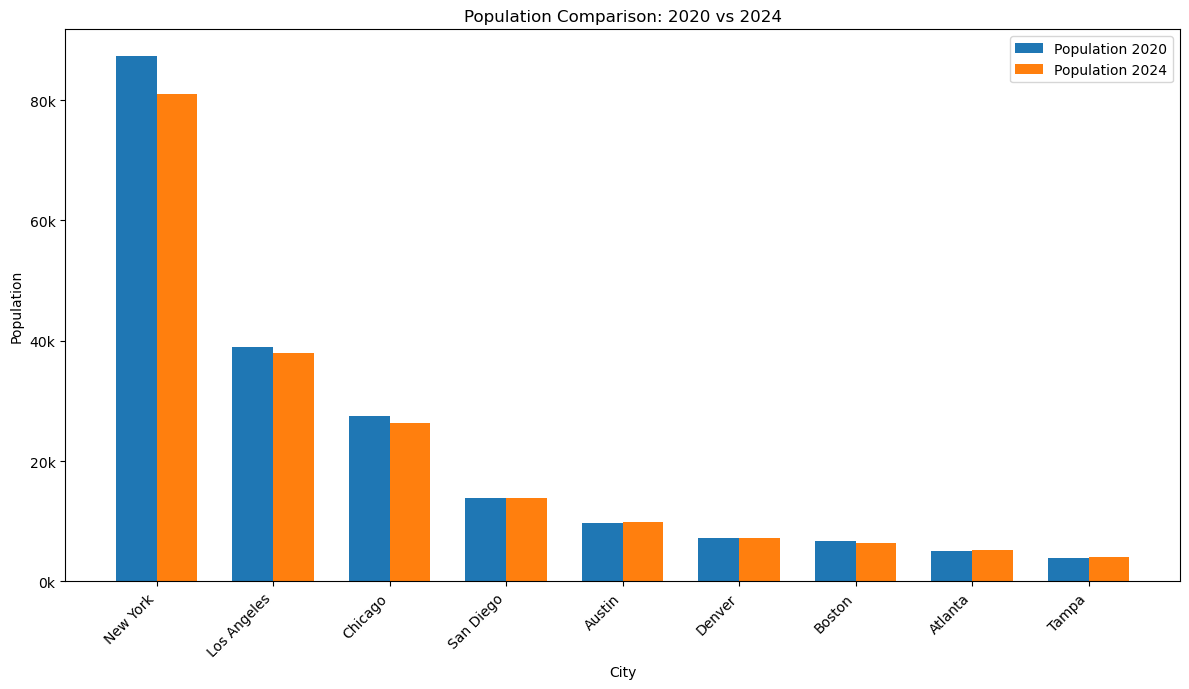

In [41]:
cities = filtered_df_cleaned['US City']

def thousands(x, pos):
    return f'{int(x / 100000)}k'

bar_width = 0.35
index = np.arange(len(cities))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the bars for Population 2020 and Population 2024
bars1 = ax.bar(index, filtered_df_cleaned['Population 2020'], bar_width, label='Population 2020')
bars2 = ax.bar(index + bar_width, filtered_df_cleaned['Population 2024'], bar_width, label='Population 2024')

# Add labels, title, and ticks
ax.set_xlabel('City')
ax.set_ylabel('Population')
ax.set_title('Population Comparison: 2020 vs 2024')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(cities, rotation=45, ha='right')

# Format the y-axis to show values in thousands
ax.yaxis.set_major_formatter(FuncFormatter(thousands))

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()